### Importation

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,normalize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn import feature_selection
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
# import xgboost as xgb
import pickle as pk
import numpy as np

### Preparation des données

In [6]:
data_prof = pd.read_csv('Data_Arbre.csv')
# data_debase = pd.read_csv('Patrimoine_Arbore.csv', encoding='latin1')

In [7]:
cols = ["fk_arb_etat","tronc_diam","haut_tot","fk_stadedev","age_estim", "clc_quartier", "feuillage", "fk_port", "fk_nomtech", "fk_revetement"]
data = data_prof[cols]

index = data[(data["fk_arb_etat"] == "Essouché") | (data["fk_arb_etat"] == "Non essouché")]
index = data[(data["fk_arb_etat"] == "SUPPRIMÉ") | 
             (data["fk_arb_etat"] == "ABATTU") | 
             (data["fk_arb_etat"] == "EN PLACE") | 
             (data["fk_arb_etat"] == "REMPLACÉ")].index

data.drop(index, inplace=True)

data.loc[data["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data.loc[data["fk_arb_etat"] == "Non essouché", "fk_arb_etat"] = 0

# data.loc[data["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data.fk_arb_etat = data.fk_arb_etat.astype(int)
# data.fk_arb_etat.value_counts()

C:\Users\thile\AppData\Local\Temp\ipykernel_9804\1887067551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index, inplace=True)
C:\Users\thile\AppData\Local\Temp\ipykernel_9804\1887067551.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fk_arb_etat = data.fk_arb_etat.astype(int)


In [8]:
#Encodage
#Get dummies de pandas encoder en hot one
encoder = OrdinalEncoder()
lst_col = ['fk_stadedev', 'clc_quartier', 'feuillage', 'fk_port', 'fk_nomtech', "fk_revetement"]

temp = data[lst_col]

data[lst_col] = encoder.fit_transform(temp)

C:\Users\thile\AppData\Local\Temp\ipykernel_9804\992099324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lst_col] = encoder.fit_transform(temp)


In [9]:
X_data = data.drop(columns=["fk_arb_etat"])
Y_data = data["fk_arb_etat"]

# X_data = normalize(X_data)


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=55, stratify=Y_data)

In [167]:
# Y_test.value_counts()

### AdaBoost

In [10]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, Y_train)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [11]:
pred = ada.predict(X_train)
# mlp.score(X_test, Y_test)
# pred
score = accuracy_score(Y_train, pred)
score

0.9869281045751634

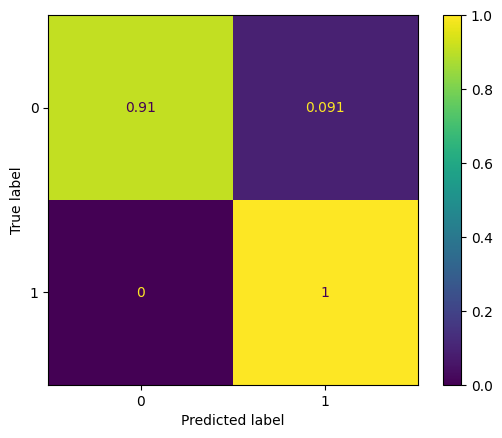

In [12]:
pred = ada.predict(X_train)
mat  = confusion_matrix(Y_train, pred, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  ada.classes_)
disp.plot()

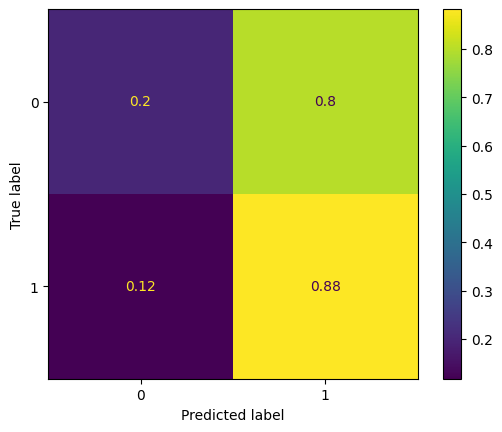

In [13]:
pred2 = ada.predict(X_test)
mat  = confusion_matrix(Y_test, pred2, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  ada.classes_)
disp.plot()

SMOTE

In [15]:
# sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.4)
sm = SMOTE(random_state=42, n_jobs=-1)
X_smote, Y_smote = sm.fit_resample(X_train, Y_train)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [16]:
ada_smoted = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_smoted.fit(X_smote, Y_smote)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

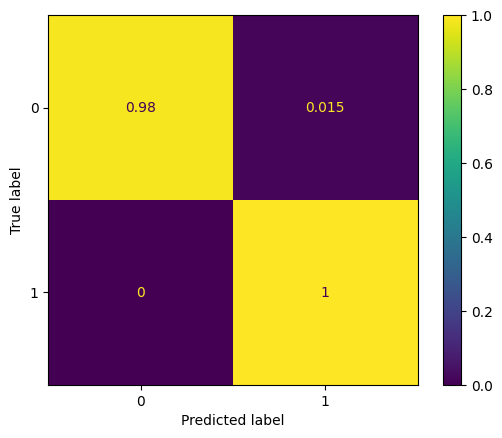

In [17]:
pred = ada_smoted.predict(X_smote)
mat  = confusion_matrix(Y_smote, pred, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  ada_smoted.classes_)
disp.plot()

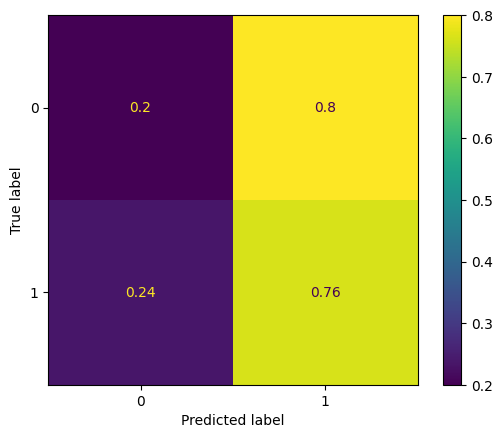

In [18]:
pred2 = ada_smoted.predict(X_test)
mat  = confusion_matrix(Y_test, pred2, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  ada_smoted.classes_)
disp.plot()

### MLP

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 50), validation_fraction=0.2, learning_rate='adaptive', random_state=42, max_iter=10000)
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(20, 50), learning_rate='adaptive',
              max_iter=10000, random_state=42, validation_fraction=0.2)

In [21]:
pred = mlp.predict(X_train)
# mlp.score(X_test, Y_test)
# pred
score = accuracy_score(Y_train, pred)
score

0.8562091503267973

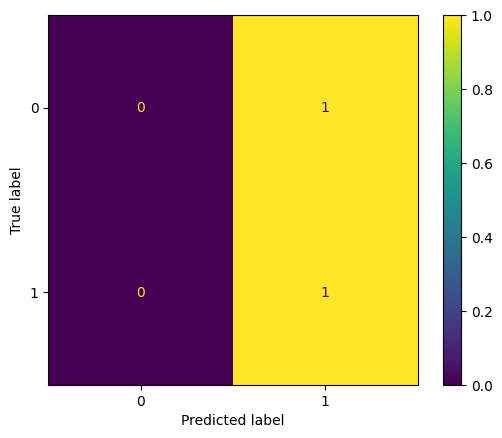

In [22]:
pred = mlp.predict(X_train)
mat  = confusion_matrix(Y_train, pred, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  mlp.classes_)
disp.plot()

In [247]:
pred2 = mlp.predict(X_test)
mat  = confusion_matrix(Y_test, pred2, normalize='true')
mat

array([[0., 1.],
       [0., 1.]])

SMOTE

In [23]:
# sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.4)
sm = SMOTE(random_state=42, n_jobs=-1)
X_smote, Y_smote = sm.fit_resample(X_train, Y_train)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [24]:
mlp_smoted = MLPClassifier(hidden_layer_sizes=(20, 50),validation_fraction=0.2, learning_rate='adaptive')
mlp_smoted.fit(X_smote, Y_smote)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 50), learning_rate='adaptive',
              validation_fraction=0.2)

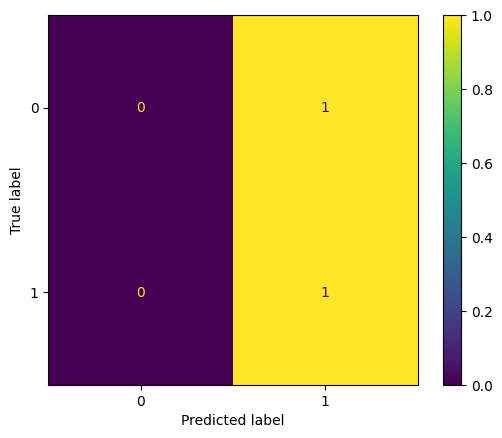

In [26]:
pred = mlp.predict(X_smote)
mat  = confusion_matrix(Y_smote, pred, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  mlp.classes_)
disp.plot()

In [251]:
pred2 = mlp.predict(X_test)
mat  = confusion_matrix(Y_test, pred2, normalize='true')
mat

array([[0., 1.],
       [0., 1.]])

### Dummy

In [27]:
dum = DummyClassifier(random_state=42, strategy="most_frequent")
dum.fit(X_smote, Y_smote)

DummyClassifier(random_state=42, strategy='most_frequent')

In [241]:
pred = dum.predict(X_train)
# mlp.score(X_test, Y_test)
# pred
score = accuracy_score(Y_train, pred)
score

0.1437908496732026

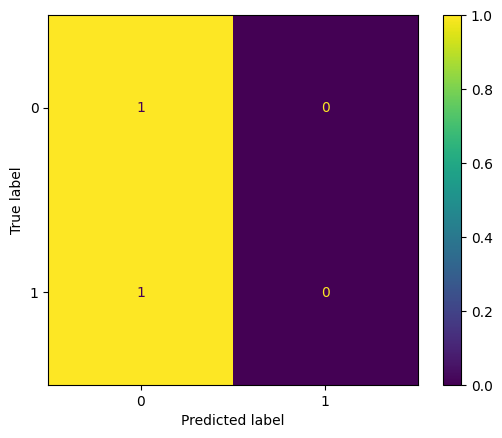

In [28]:
pred = dum.predict(X_smote)
mat  = confusion_matrix(Y_smote, pred, normalize='true')
mat
disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  dum.classes_)
disp.plot()